In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from matplotlib.colors import ListedColormap
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
from io import StringIO
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('default')
import seaborn as sb

In [21]:
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy', 'Sunny'],
    'Temperature': ['Hot', 'Hot', 'Mild', 'Cold', 'Cold', 'Cold', 'Mild', 'Hot', 'Mild', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild', 'Hot'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True],
    'Play Golf': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)
df

,Outlook,Temperature,Humidity,Windy,Play Golf
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Mild,High,False,Yes
3,Rainy,Cold,High,False,Yes
4,Rainy,Cold,Normal,False,Yes
5,Rainy,Cold,Normal,True,No
6,Overcast,Mild,Normal,True,Yes
7,Sunny,Hot,High,False,No
8,Sunny,Mild,Normal,False,Yes
9,Rainy,Mild,Normal,False,Yes


In [22]:
df = pd.get_dummies(df, columns=['Outlook', 'Temperature', 'Humidity', 'Windy'], drop_first=True)

In [29]:
df

,Play Golf,Outlook_Rainy,Outlook_Sunny,Temperature_Hot,Temperature_Mild,Humidity_Normal,Windy_True
0,No,False,True,True,False,False,False
1,No,False,True,True,False,False,True
2,Yes,False,False,False,True,False,False
3,Yes,True,False,False,False,False,False
4,Yes,True,False,False,False,True,False
5,No,True,False,False,False,True,True
6,Yes,False,False,False,True,True,True
7,No,False,True,True,False,False,False
8,Yes,False,True,False,True,True,False
9,Yes,True,False,False,True,True,False


In [23]:
## Independent / Dependent variables
X = df.drop(['Play Golf'], axis=1)
y = df[['Play Golf']]

In [24]:
dtc = DecisionTreeClassifier()
dtc.fit(X, y)

DecisionTreeClassifier()

In [25]:
y_pred = dtc.predict(X_test)

In [26]:
print(metrics.accuracy_score(y_test, y_pred))

1.0


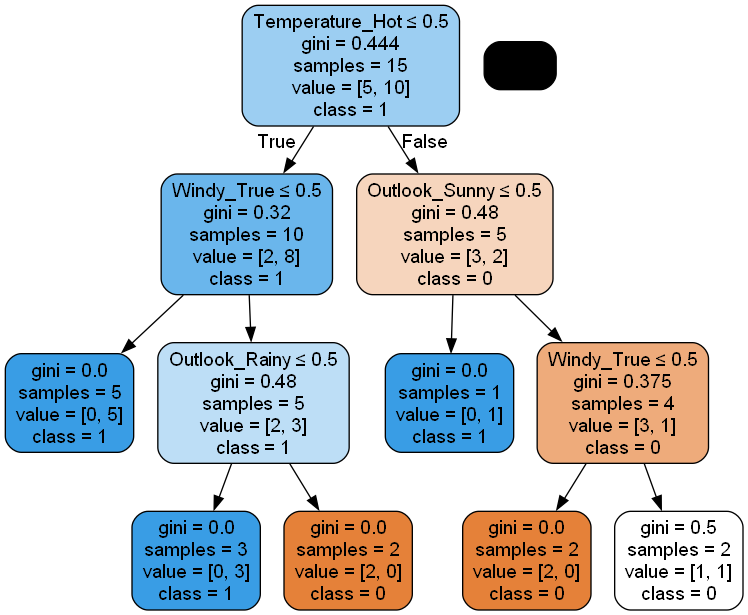

In [28]:
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Accuracy: 0.67


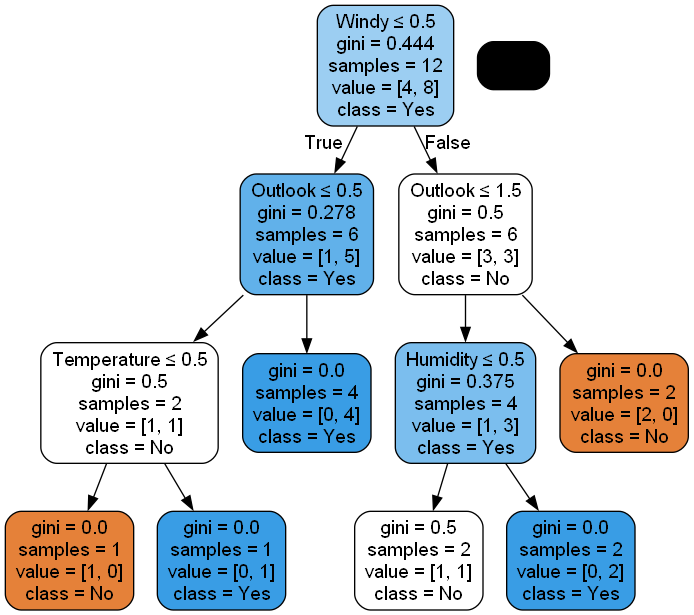

In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image  
import pydotplus
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Your data dictionary
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy', 'Sunny'],
    'Temperature': ['Hot', 'Hot', 'Mild', 'Cold', 'Cold', 'Cold', 'Mild', 'Hot', 'Mild', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild', 'Hot'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True],
    'Play Golf': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)

# Independent / Dependent variables
X = df[['Outlook', 'Temperature', 'Humidity', 'Windy']]
y = df['Play Golf']

# Map categorical values to numerical values
categorical_mapping = {
    'Sunny': 0,
    'Overcast': 1,
    'Rainy': 2,
    'Hot': 0,
    'Mild': 1,
    'Cold': 2,
    'High': 0,
    'Normal': 1,
    False: 0,
    True: 1,
    'No': 0,
    'Yes': 1
}

X = X.applymap(categorical_mapping.get)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Predict on the test data
y_pred = dtc.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Create the visualization
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns, class_names=['No', 'Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
